In [2]:
from sklearn.datasets import fetch_openml

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import numpy as np

In [5]:
mnist = fetch_openml('mnist_784')

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
X,y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
some_digit = X[1]

In [11]:
some_digit_image = some_digit.reshape(28,28)

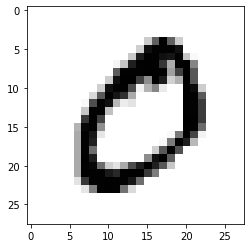

In [12]:
plt.imshow(some_digit_image, cmap="binary")

In [13]:
y[1]

'0'

In [14]:
y = y.astype(np.uint8)

In [15]:
y[0]

5

In [16]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:],y[60000:]

In [17]:
y_train_5 = (y_train == 5)

In [18]:
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state = 101)

In [21]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([False])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96945, 0.96725, 0.9511 ])

In [25]:
from sklearn.base import BaseEstimator

In [26]:
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()

In [28]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [29]:
# Confusion Matrix

from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [31]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [32]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54238,   341],
       [ 1903,  3518]])

In [33]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [34]:
# Precision

3518/(3518+341)

0.9116351386369526

In [35]:

# Recall
3518/(3518+1903)

0.648957756871426

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
precision_score(y_train_5, y_train_pred)

0.9116351386369526

In [38]:
recall_score(y_train_5, y_train_pred)

0.648957756871426

In [39]:
f1_score(y_train_5, y_train_pred)

0.7581896551724139

In [40]:
y_scores = sgd_clf.decision_function([some_digit])

In [41]:
y_scores

array([-13775.72836117])

In [42]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [43]:
y_some_digit_pred

array([False])

In [44]:
threshold = -14000
y_some_digit_pred = (y_scores > threshold)

In [45]:
y_some_digit_pred

array([ True])

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [47]:
y_scores

array([   624.17932844, -20650.81735847, -25731.93802333, ...,
         2696.953689  ,  -6733.71280883, -13721.50231679])

In [48]:
from sklearn.metrics import precision_recall_curve

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1])

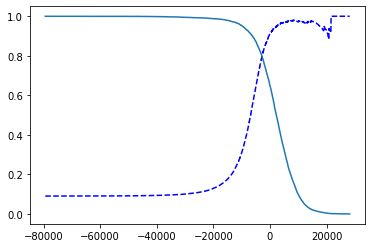

In [50]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [51]:
recalls.shape

(59917,)

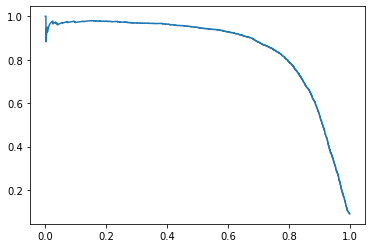

In [52]:
plt.plot(recalls, precisions)

In [53]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [54]:
threshold_90_precision

-410.06324022694974

In [55]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [56]:
precision_score(y_train_5, y_train_pred_90)

0.9000736557819788

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.6762589928057554

In [58]:
threshold_80_precision = thresholds[np.argmax(precisions>=0.8)]

In [59]:
y_train_pred_80 = (y_scores >= threshold_80_precision)

In [60]:
precision_score(y_train_5, y_train_pred_80)

0.8000743218134523

In [61]:
recall_score(y_train_5, y_train_pred_80)

0.7943183914406936

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

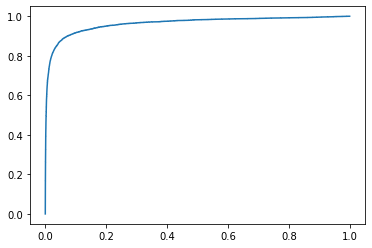

In [64]:
plt.plot(fpr, tpr)

In [65]:
roc_auc_score(y_train_5, y_scores)

0.9631504669884124

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
forest_clf =  RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [68]:
y_scores_forest = y_probas_forest[:,1]

In [69]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [70]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

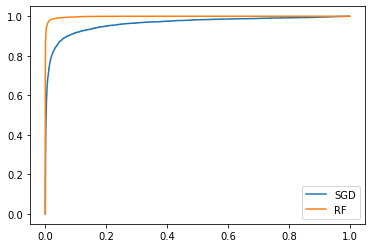

In [71]:
plt.plot(fpr,tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='RF')
plt.legend(loc='lower right')

In [72]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [73]:
forest_clf.fit(X_train, y_train_5)
y_train_pred_rf = forest_clf.predict(X_train)

In [74]:
confusion_matrix(y_train_5, y_train_pred_rf)

array([[54579,     0],
       [    0,  5421]])

In [75]:
precision_score(y_train_5,y_train_pred_rf)

1.0

In [76]:
recall_score(y_train_5, y_train_pred_rf)

1.0

In [77]:
from sklearn.svm import SVC

In [78]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
svm_clf.predict([some_digit])

array([0], dtype=uint8)

In [80]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [81]:
some_digit_scores

array([[ 9.31776763,  0.69966542,  8.26937495,  3.82063539, -0.30671293,
         7.27141643,  3.80978873,  1.72165536,  6.0316466 ,  3.83885601]])

In [82]:
np.argmax(some_digit_scores)

0

In [83]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

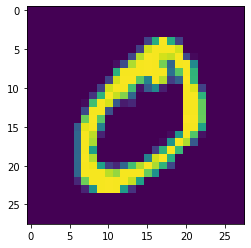

In [84]:
plt.imshow(some_digit_image)

In [88]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [89]:
cross_val_score(sgd_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89925, 0.8939 , 0.90555])

In [90]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [91]:
conf_mx

array([[5586,    0,   22,    6,    9,   44,   35,    6,  214,    1],
       [   0, 6404,   36,   25,    4,   45,    4,    8,  204,   12],
       [  27,   29, 5240,  100,   72,   27,   64,   38,  351,   10],
       [  24,   17,  118, 5252,    2,  210,   25,   40,  371,   72],
       [  12,   14,   48,   12, 5206,   12,   34,   26,  308,  170],
       [  28,   15,   30,  172,   52, 4475,   73,   16,  497,   63],
       [  29,   16,   44,    3,   43,   96, 5553,    5,  128,    1],
       [  21,   10,   53,   31,   50,   13,    3, 5706,  171,  207],
       [  18,   65,   45,   91,    3,  128,   24,   11, 5421,   45],
       [  25,   18,   30,   67,  119,   36,    1,  180,  342, 5131]])

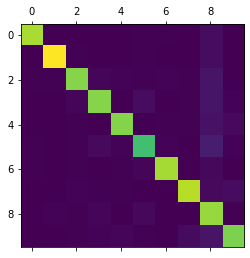

In [93]:
plt.matshow(conf_mx)

In [ ]:
A